In [1]:
import emcee
import dlsfunctions as dls
import numpy as np
import matplotlib.pyplot as plt
import initialization_data as init

In [2]:
d = init.get_distance()
time = init.get_time()
gamma = init.get_gamma()

mean = init.get_right_mean()
sigma = init.get_real_wide_sigma()

c = init.c
m = init.m
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)

theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time)

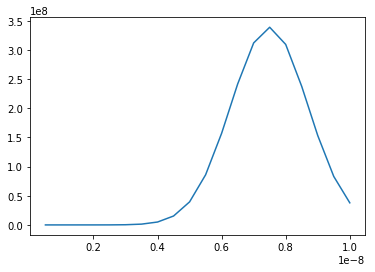

In [3]:
plt.plot(d, f)

In [4]:
theta_input = np.append(f, beta)

In [5]:
sim_data = dls.g2(theta_input, d, m, gamma, time)

In [6]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [7]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)

In [8]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)

In [9]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.37 , 0.391, 0.374, 0.396, 0.4  , 0.377, 0.379, 0.368, 0.377,
       0.355, 0.373, 0.381, 0.402, 0.394, 0.367, 0.397, 0.375, 0.391,
       0.381, 0.345, 0.379, 0.399, 0.371, 0.397, 0.381, 0.381, 0.381,
       0.369, 0.388, 0.373, 0.352, 0.374, 0.37 , 0.383, 0.39 , 0.369,
       0.35 , 0.371, 0.356, 0.389, 0.399, 0.383, 0.388, 0.364, 0.398,
       0.38 , 0.369, 0.355, 0.389, 0.402, 0.398, 0.381, 0.41 , 0.406,
       0.36 , 0.373, 0.401, 0.369, 0.37 , 0.378, 0.38 , 0.392, 0.372,
       0.369, 0.368, 0.415, 0.372, 0.385, 0.384, 0.383, 0.4  , 0.363,
       0.364, 0.391, 0.371, 0.422, 0.369, 0.372, 0.376, 0.413, 0.393,
       0.376, 0.4  , 0.348, 0.4  , 0.353, 0.386, 0.336, 0.382, 0.4  ,
       0.409, 0.385, 0.389, 0.361, 0.399, 0.342, 0.396, 0.367, 0.364,
       0.394])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


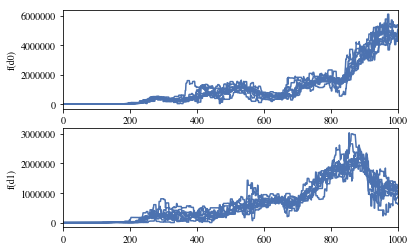

In [10]:
dls.view_burnin_plot(result, 0, 1)

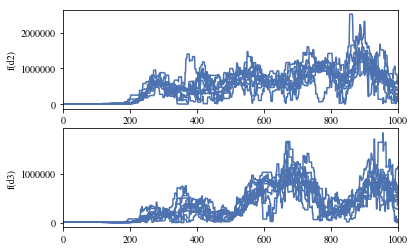

In [11]:
dls.view_burnin_plot(result, 2, 3)

In [12]:
chained_samples = dls.chain(result, 850, ndim)

In [13]:
samples_df = dls.create_dataframe(chained_samples, ndim)
q = samples_df.quantile([0.5], axis=0)
q

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,3.875324e+06,1.463547e+06,8.349051e+07,1.600455e+08,2.401724e+08,2.999977e+08,3.482818e+08,3.079806e+08,2.369727e+08,1.625614e+08,8.685190e+07,3.090790e+07,824853.421342,670539.447425,4.779883e+06,3.522233e+06,5.050322e+06,1.046527e+07,4.611044e+06,4.294199e+07


In [14]:
infer = np.zeros(20)
infer[0] = 3.875324e+06
infer[1] = 1.463547e+06
infer[2] = 824853.421342
infer[3] = 670539.447425
infer[4] = 4.779883e+06
infer[5] = 3.522233e+06
infer[6] = 5.050322e+06
infer[7] = 1.046527e+07
infer[8] = 4.611044e+06
infer[9] = 4.294199e+07
infer[10] = 8.349051e+07
infer[11] = 1.600455e+08
infer[12] = 2.401724e+08
infer[13] = 2.999977e+08
infer[14] = 3.482818e+08
infer[15] = 3.079806e+08
infer[16] = 2.369727e+08
infer[17] = 1.625614e+08
infer[18] = 8.685190e+07
infer[19] = 3.090790e+07


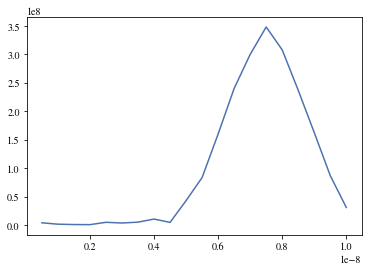

In [15]:
plt.plot(d, infer)

In [17]:
beta_df = dls.get_beta(chained_samples, ndim)
beta_infer = beta_df.quantile([0.5], axis=0)

In [18]:
theta_infer = np.append(infer, beta_infer)

In [19]:
inferg2 = dls.g2(theta_infer, d, m, gamma, time)

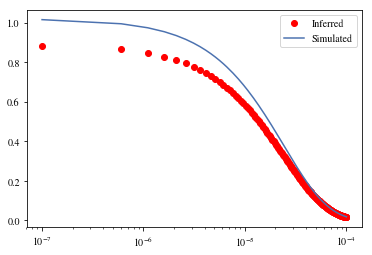

In [20]:
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

In [21]:
beta_posterior = dls.get_beta(chained_samples, ndim)

In [22]:
beta_posterior

,beta
0,1.328210
1,1.328210
2,1.328210
3,1.254308
4,1.254308
5,1.254308
6,1.247102
7,1.451707
8,1.451707
9,1.451707


In [26]:
beta_quantiles = beta_df.quantile([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90], axis =0)

In [28]:
beta_quantiles

,beta
0.1,0.318887
0.2,0.470835
0.3,0.620215
0.4,0.751619
0.5,0.871734
0.6,0.997672
0.7,1.128753
0.8,1.256447
0.9,1.436529


Text(0,0.5,'Inferred beta value')

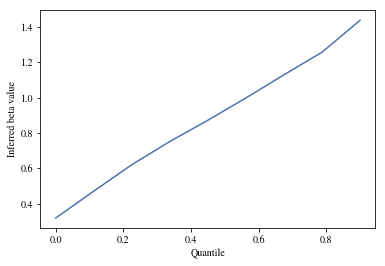

In [30]:
x = np.linspace(0, 0.9, 9)
plt.plot(x, beta_quantiles.values)
plt.xlabel('Quantile')
plt.ylabel('Inferred beta value')